#Assignment 1: Submit a write-up on the following:

- Hugging face agents
the agents is an llm that can make task for you like customer serveses

- Hugging face pipeline for text generation

the pipline contain all features that contribut in generate that. text for example temp. will measur how createv the model is and max length will measur the length

- HF inference endpoints
it is the way to run the model on HG gpus without any load on enduser


- Give feedback on the image generation and explore different models available on the Hugging Face website
I have tried many image genration models and I found it was limeted but giving some good results an example is this emage from LAI-ImageGeneration-v2 model
blob:https://huggingface.co/98cd203f-e683-4c73-ad3c-9949d18f2ae0 the promot was "draw a girl fly on flower in rainy day"



#Assignment 2: Using OpenAI's CLIP Model for Image Captioning and Building an Image Search Engine

#Objective

##In this assignment, you will use OpenAI's CLIP (Contrastive Language-Image Pre-training) model to:
- Generate captions for 15 different images.
- Build a search engine for these images using a larger dataset of images.


##Part 1: Generate Captions for Images

##Part 2: Build an Image Search Engine


##Submission
Submit the following as a **Streamlit** app:

- Your Python code for generating captions and building the search engine.
- A report describing your approach, challenges faced, and how you overcame them.
- Screenshots of the interface and results.

Evaluation Criteria

- Correctness and efficiency of the code.
- Clarity and completeness of the report.
- Usability and functionality of the search engine interface.

#Please don't use any Generative AI Models

In [3]:
!pip install transformers

In [4]:
#Part 1: Generate Captions for Images
import requests
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

img_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/demo.jpg'
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')
urls = [
    "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQmmgx-TqxBNoPqMSFIGy_tadAvfUbN0Wl1oQ&s",
    "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRSDLK_AC_1oAmztGd-JNW9lxoiGZ18oAkNnA&s",
    "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcToVAn-WCEUt7wS6YjUH2GH04aT7Eee9Mzyjg&s",
    "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQrzd3NMlCLGbeQYdWwOHoSMLOg8alhsd6P7Q&s",
    "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR8-uEQ_N4kcsR7bfNqMKK-PYrC88jEj-Y3Tg&s",
    "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTNoFVYNTcHEKSKpjtLMibrxJu3Qb9B9ygfFw&s",
    "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRxsL8NRMFrOOvi-1NtSgr0IFCr7wqgk5uJDg&s",
    "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR2ML6mm1FtgbS0Tw7fo2FGzgJ3Yt1pny9LOQ&s",
    "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRS3w87ZcaSFSUFNuJPG5D603G_ASjjHeQMkA&s",
    "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSgchcpQWXnedVZjwmB12xn7vyDkak4CMzH9g&s",
    "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRrh9-ftTq0TLQuESpKn73UqBjKAlz77xIFFA&s",
    "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSZS0QPlRDPe_xKztZdPEDG1JYMztKcMKOHUQ&s",
    "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS70KfJiWI8gR1cnKeqDEFO6gRy91BeCxlnrw&s",
    "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR10unDbE5H5H2FMDNT8qs4JfyE9hSxIXXICg&s",
    "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSxAtJjPL7F4ZGaMjJHj6m4jhWDr1rcWApUfA&s"
]
captions_list=[]
images = [
    Image.open(requests.get(url, stream=True).raw) for url in urls]

# let's see what we have
# conditional image captioning
text = "a photography of"

for image in images:
  inputs = processor(image, text, return_tensors="pt")
  out = model.generate(**inputs)
  caption = processor.decode(out[0], skip_special_tokens=True)
  #captions_list.appeand(caption)
  print(caption)







/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1249: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


a photography of a meerkat family
a photography of a polar bear on a rock
a photography of a hippody
a photography of a hippoy in the water
a photography of a red panda
a photography of a fa fa fa fa fa fa fa fa fa fa fa fa fa fa fa
a photography of a polar bear and her cub
a photography of a cat and a bunch of chicks
a photography of a che che che che che che che che che che che che che che che
a photography of two pup
a photography of three kittens in a field
a photography of a tiger walking across a stream
a photography of a red fox
a photography of a raccoon
a photography of a zebra and a zebra standing together


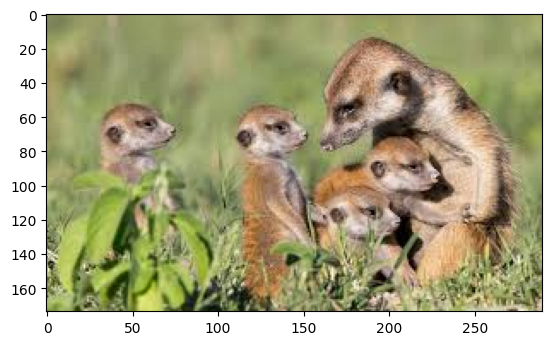

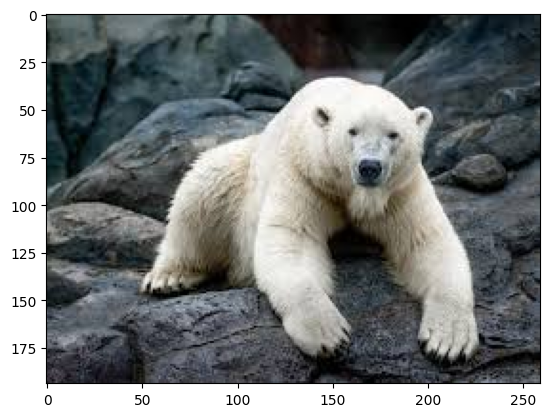

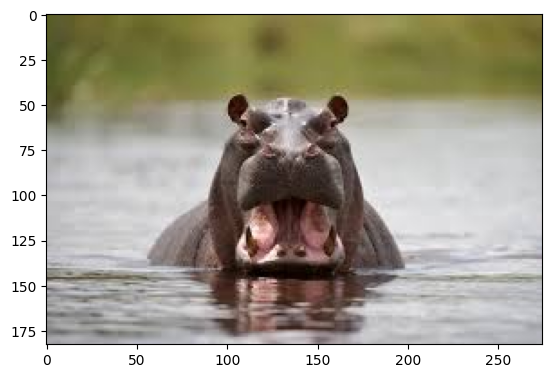

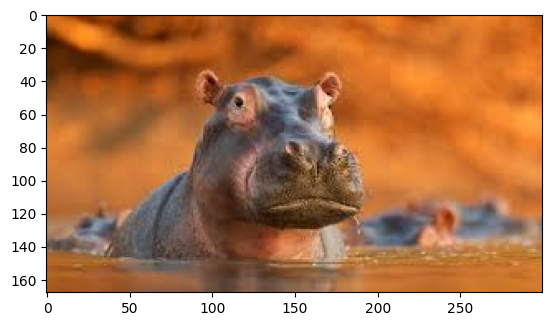

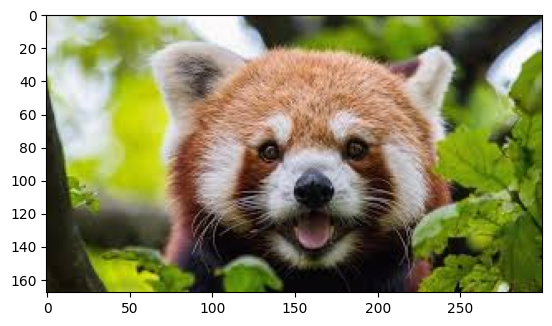

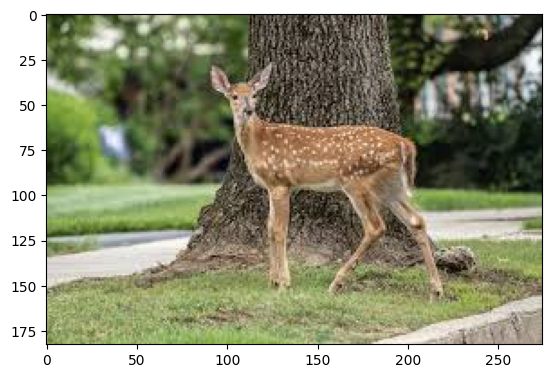

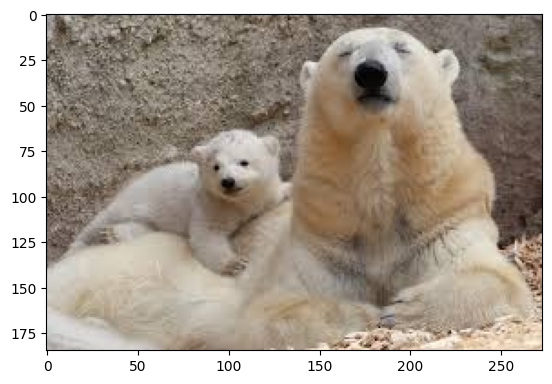

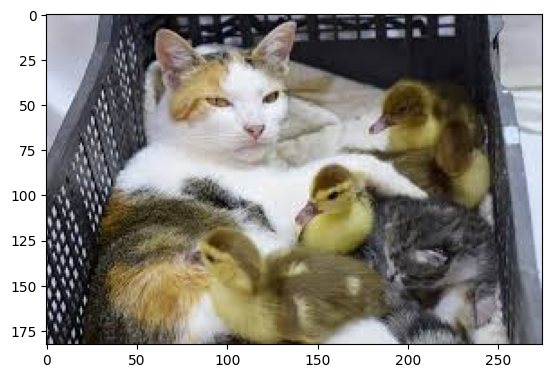

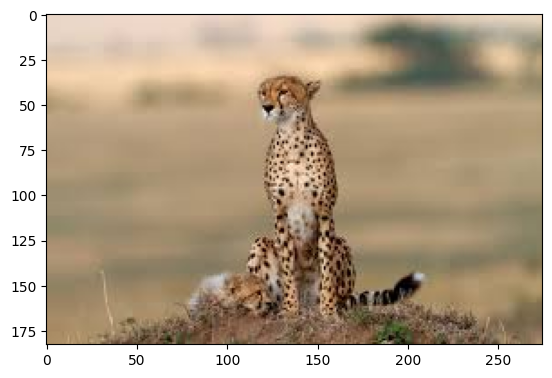

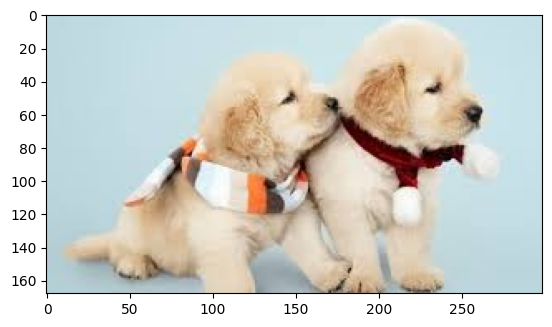

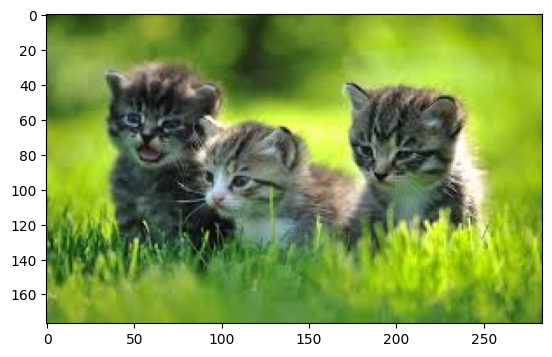

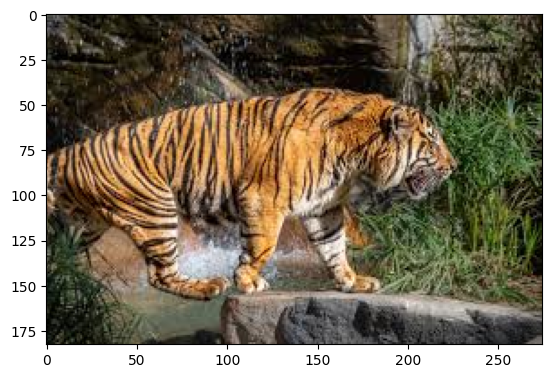

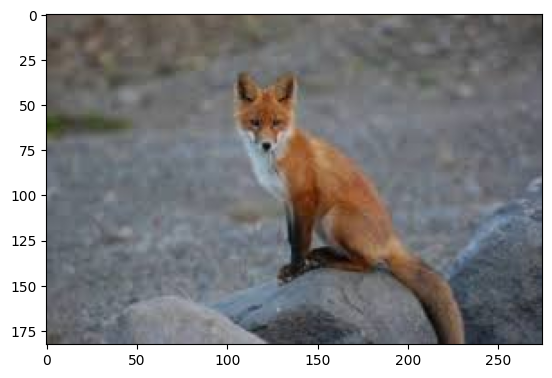

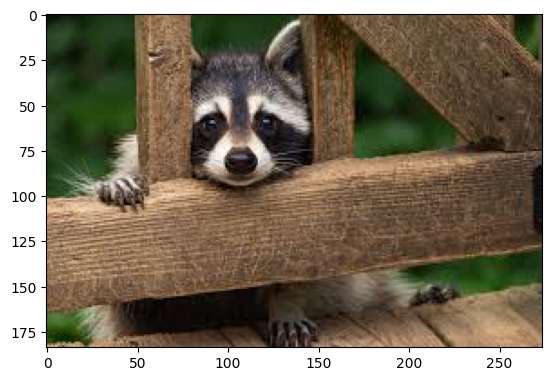

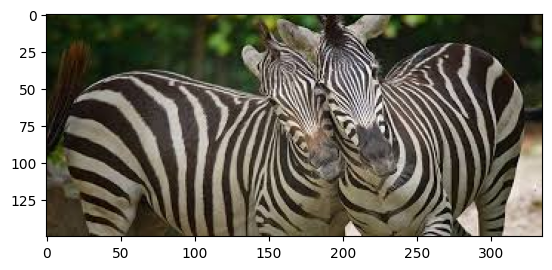

In [5]:
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import requests

urls = [
    "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQmmgx-TqxBNoPqMSFIGy_tadAvfUbN0Wl1oQ&s",
    "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRSDLK_AC_1oAmztGd-JNW9lxoiGZ18oAkNnA&s",
    "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcToVAn-WCEUt7wS6YjUH2GH04aT7Eee9Mzyjg&s",
    "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQrzd3NMlCLGbeQYdWwOHoSMLOg8alhsd6P7Q&s",
    "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR8-uEQ_N4kcsR7bfNqMKK-PYrC88jEj-Y3Tg&s",
    "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTNoFVYNTcHEKSKpjtLMibrxJu3Qb9B9ygfFw&s",
    "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRxsL8NRMFrOOvi-1NtSgr0IFCr7wqgk5uJDg&s",
    "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR2ML6mm1FtgbS0Tw7fo2FGzgJ3Yt1pny9LOQ&s",
    "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRS3w87ZcaSFSUFNuJPG5D603G_ASjjHeQMkA&s",
    "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSgchcpQWXnedVZjwmB12xn7vyDkak4CMzH9g&s",
    "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRrh9-ftTq0TLQuESpKn73UqBjKAlz77xIFFA&s",
    "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSZS0QPlRDPe_xKztZdPEDG1JYMztKcMKOHUQ&s",
    "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS70KfJiWI8gR1cnKeqDEFO6gRy91BeCxlnrw&s",
    "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR10unDbE5H5H2FMDNT8qs4JfyE9hSxIXXICg&s",
    "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSxAtJjPL7F4ZGaMjJHj6m4jhWDr1rcWApUfA&s"
]

images = [
    Image.open(requests.get(url, stream=True).raw) for url in urls]

# let's see what we have
for image in images:
    plt.show(plt.imshow(np.asarray(image)))

In [6]:
from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained('openai/clip-vit-base-patch32')
processor = CLIPProcessor.from_pretrained('openai/clip-vit-base-patch32')

In [17]:
'''captions = ["a fox on the rocks",
            "two dogs laying",
            "tow zebra standing",
            "baby coala behined the wood",
            "trees in the park",
            "a cucumber dog",
           "a tigar in jungel",
           "three kittens on the grass",
           "a Cheetahs exploring",
           "a cat with baby ducks",
           "a baby panda and their mom",
           "a red fox face",
           "a Gary Brookshaw",
           "a hippos in the water",
           "group of meerkats ",
           "big beer laying on the rocks"]'''


captions = ["fox","","","","","","","","",""]
inputs = processor(
    text=captions, images=images,
    return_tensors='pt', padding=True
)

outputs = model(**inputs)

probs = outputs.logits_per_image.argmax(dim=1)
print(probs)
probs_list  = probs.tolist()



tensor([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1])


fox


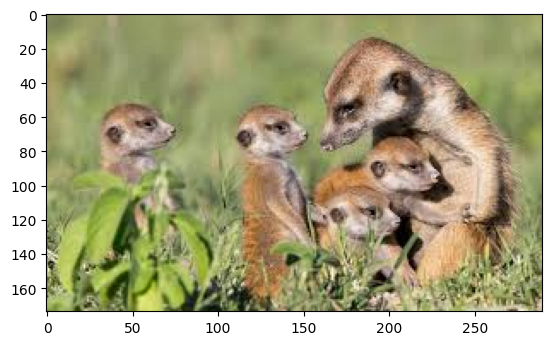

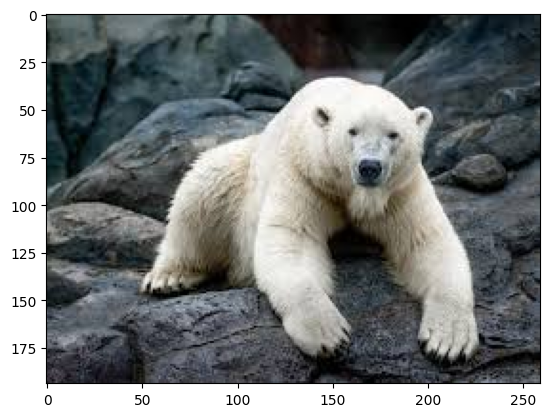

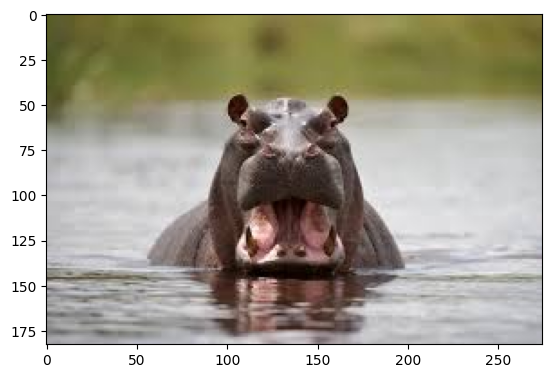

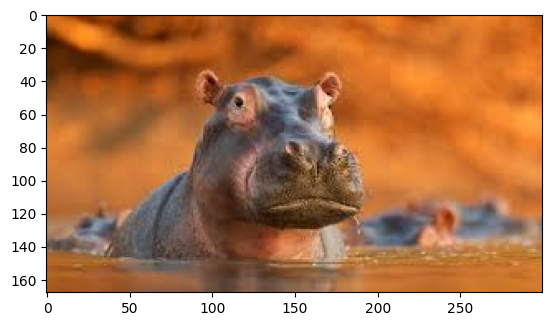

fox


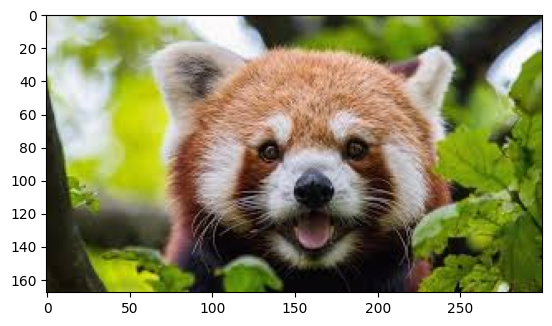

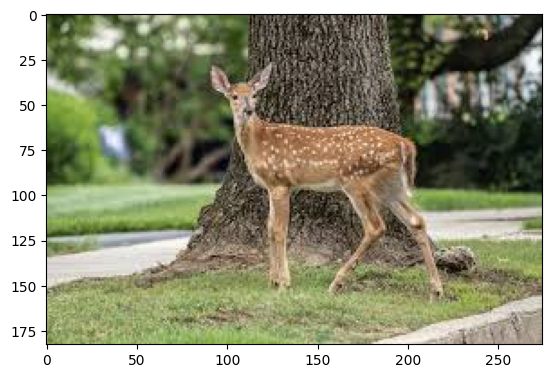

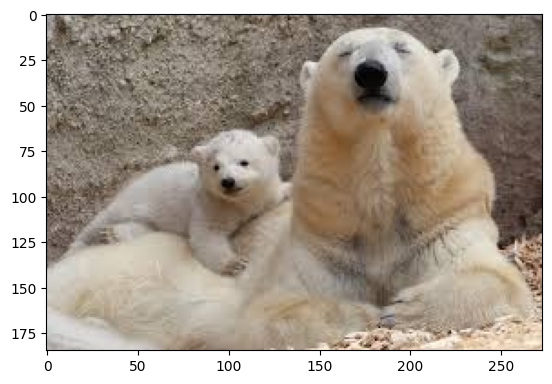

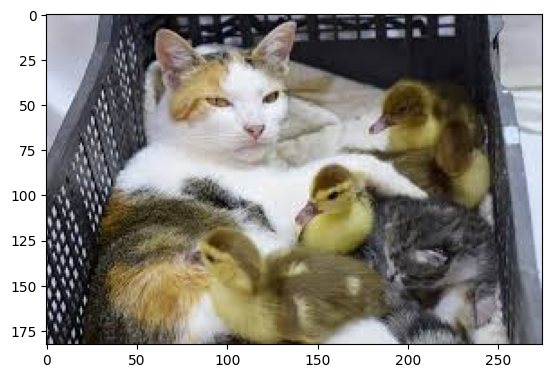

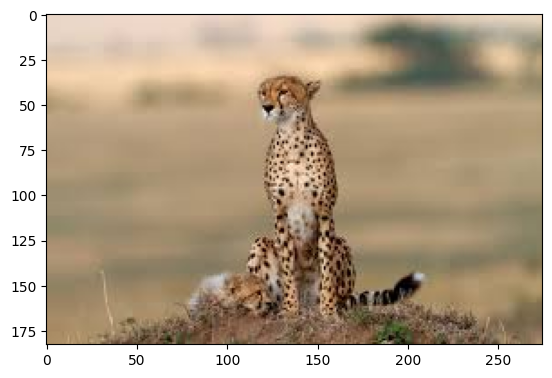

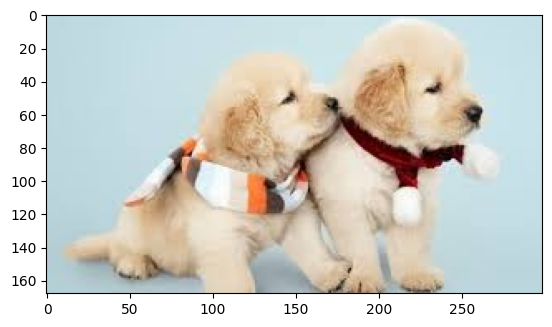

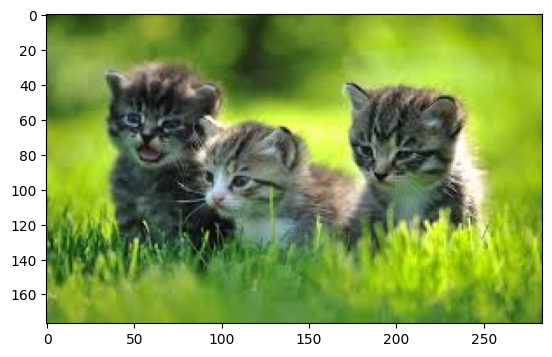

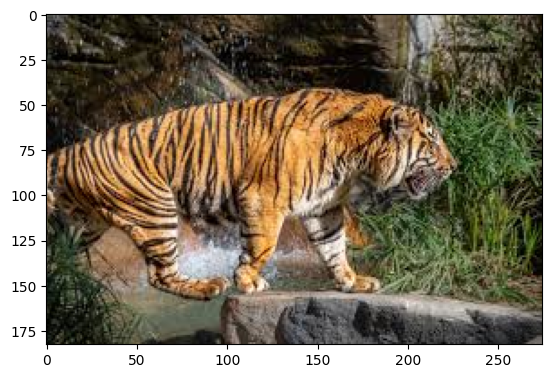

fox


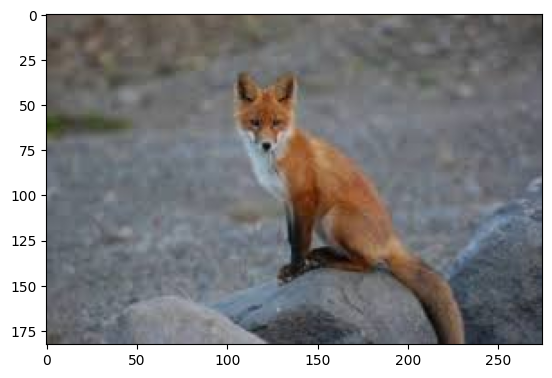

fox


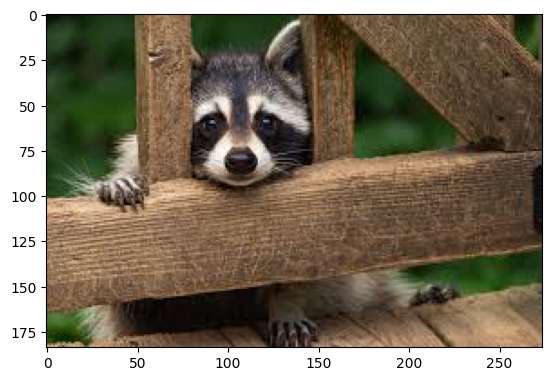

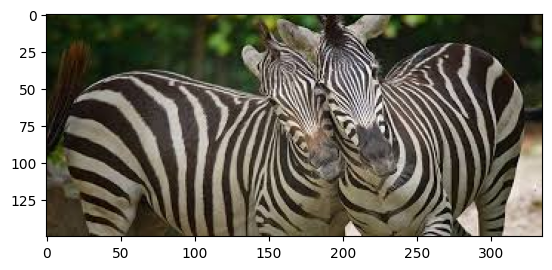

In [16]:
for i, image in enumerate(images):
    argmax = probs[i].item()
    print(captions[argmax])
    plt.show(plt.imshow(np.asarray(image)))